<a href="https://colab.research.google.com/github/BrendaLoznik/waterpumps/blob/main/waterpumps_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Housekeeping

### 1.1 Load libraries

In [3]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,accuracy_score,  roc_curve, auc, f1_score, recall_score, precision_score

#machine learning
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.2 Custom functions

In [7]:
def confusion_matrix_plotter (y_test,y_pred):
  fig, ax = plt.subplots(figsize=(8,5)) 
  data = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
  ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
  ax.set_xlabel("Predicted")
  ax.set_ylabel ("Actual")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.set_yticklabels(ax.get_xticklabels(), rotation=0)

In [9]:
def feature_importances (model):
  features= X_train.columns
  importances = np.round(model.feature_importances_,3) 
  indices = np.argsort(importances)
  num_features = len(features)
  fig, ax = plt.subplots(figsize=(10,10)) 
  plt.barh(range(num_features), importances[indices[-num_features:]],  align='center')
  plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
  plt.xlabel('Relative Importance')
  plt.title('Feature Importance')
plt.show()

#### 1.3 Load data

In [10]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
train_labels = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Waterpump-github/train_labels.csv')
train_values = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Waterpump-github/train_values.csv', parse_dates = ['date_recorded' ],  na_values = [0, '0'])
test_values = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Waterpump-github/test_values.csv', parse_dates = ['date_recorded' ] , na_values = [0, '0'])
final_df = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Waterpump-github/final_df.csv')
final_df = final_df.drop('Unnamed: 0', axis=1)

# 2 Modelling

In [19]:
#define train and test 
train_set = final_df [final_df ["id"].isin(train_values["id"])]
test_set =  final_df  [final_df  ["id"].isin(test_values["id"])]

In [20]:
#define X and y for training the model
X= train_set.drop(['id', 'status_group'], axis=1)
y = train_set['status_group']

### 2.1 Model overview

In [21]:

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

models=[LogisticRegression(max_iter = 1000000,  random_state=42),
        KNeighborsClassifier(),
        DecisionTreeClassifier( random_state=42),
       RandomForestClassifier( random_state=42),
       XGBClassifier( random_state=42),
        BaggingClassifier( random_state=42), 
        AdaBoostClassifier( random_state=42),
        GradientBoostingClassifier( random_state=42),
       CatBoostClassifier( random_state=42)]


names =['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier',  'XGB Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Catboost Classifier']

train_accuracy=[]
test_accuracy=[]


for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    
    #y_pred
    test_pred=clf.predict(X_test)
    train_pred=clf.predict(X_train) 

    
    #accuracy
    train_accuracy.append(accuracy_score(y_train , train_pred))
    test_accuracy.append(accuracy_score(y_test , test_pred))
    
   
d = {'Model':names,'Train accuracy':train_accuracy, 'Test accuracy':test_accuracy}   
score_df = pd.DataFrame(d)
score_df

Learning rate set to 0.096348
0:	learn: 1.0295572	total: 35.1ms	remaining: 35.1s
1:	learn: 0.9759462	total: 63.4ms	remaining: 31.6s
2:	learn: 0.9314929	total: 124ms	remaining: 41.4s
3:	learn: 0.8970364	total: 163ms	remaining: 40.6s
4:	learn: 0.8668871	total: 193ms	remaining: 38.4s
5:	learn: 0.8423085	total: 225ms	remaining: 37.3s
6:	learn: 0.8200840	total: 254ms	remaining: 36s
7:	learn: 0.8019855	total: 287ms	remaining: 35.5s
8:	learn: 0.7856137	total: 318ms	remaining: 35s
9:	learn: 0.7720152	total: 357ms	remaining: 35.4s
10:	learn: 0.7597032	total: 432ms	remaining: 38.8s
11:	learn: 0.7485633	total: 507ms	remaining: 41.7s
12:	learn: 0.7387203	total: 582ms	remaining: 44.2s
13:	learn: 0.7304204	total: 640ms	remaining: 45.1s
14:	learn: 0.7228267	total: 708ms	remaining: 46.5s
15:	learn: 0.7163558	total: 767ms	remaining: 47.2s
16:	learn: 0.7103932	total: 814ms	remaining: 47.1s
17:	learn: 0.7042196	total: 885ms	remaining: 48.3s
18:	learn: 0.6986453	total: 921ms	remaining: 47.6s
19:	learn: 0.

,Model,Train accuracy,Test accuracy
0,Logistic Regression,0.666975,0.665572
1,KNN Classifier,0.783581,0.704125
2,Decision Tree Classifier,0.987626,0.759175
3,Random Forest Classifier,0.987626,0.803620
4,XGB Classifier,0.744776,0.744697
5,Bagging Classifier,0.972180,0.795202
6,AdaBoost Classifier,0.723795,0.721633
7,Gradient Boosting Classifier,0.754393,0.753451
8,Catboost Classifier,0.826617,0.795960


### 2.2 Random forest

In [ ]:
#(running the script on Google Colab takes too long, so I will just share the results of the best_model
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)


param_grid = { 'n_estimators': [ 150, 175,  200, 225],
             'max_features':['log2', ],
             'max_depth' : [30 , 40, 50, 60, 70],      
             'min_samples_split':[6, 7, 8, 9, 10]}



#Create a based model
rf =     RandomForestClassifier( random_state=42, warm_start = True)

grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_rf .fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search_rf .best_score_)
print('Parameters:', grid_search_rf .best_params_)
print('Best Model:', grid_search_rf .best_estimator_)



Accuracy score train: 0.9216313474610156
Accuracy score test: 0.813047138047138

                         precision    recall  f1-score   support

             functional       0.80      0.90      0.85      6452
functional needs repair       0.62      0.28      0.39       863
         non functional       0.85      0.78      0.81      4565

               accuracy                           0.81     11880
              macro avg       0.76      0.66      0.68     11880
           weighted avg       0.81      0.81      0.80     11880



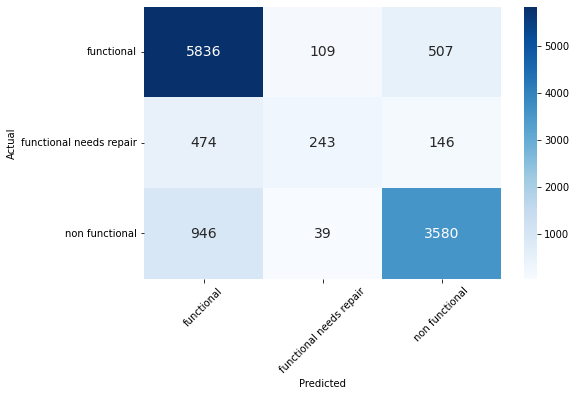

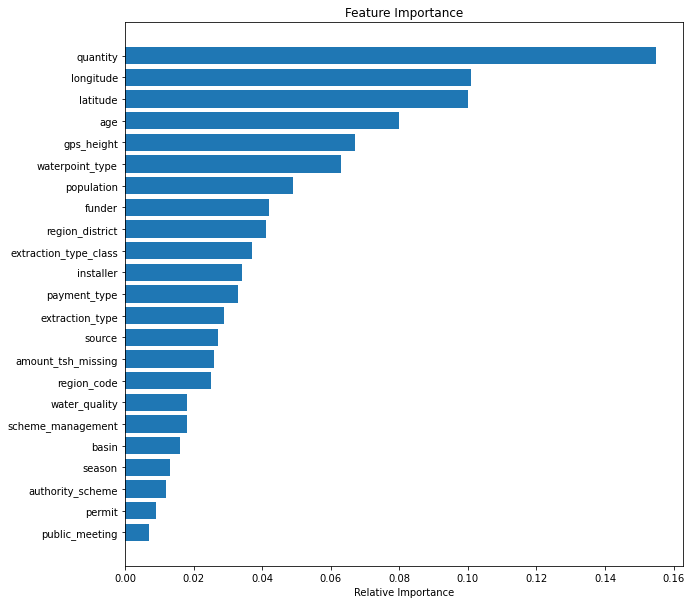

In [33]:
#score model
best_model = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model)

### 2.3 Xgboost

In [ ]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


param_grid = { 'n_estimators': [ 200, ],
              'colsample_bytree' :[  0.3, ],
              'eta': [0.2,],
             'max_depth': [12]}


#Create a based model
xgb =     XGBClassifier( random_state=42)

grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_xgb .fit(X_train, y_train,  eval_metric = 'mlogloss',)

#print best parameters 
print('Best Score:', grid_search_xgb .best_score_)
print('Parameters:', grid_search_xgb .best_params_)
print('Best Model:', grid_search_xgb .best_estimator_)


Accuracy score train: 0.9213367284665082
Accuracy score test: 0.8115319865319865

                         precision    recall  f1-score   support

             functional       0.80      0.91      0.85      6452
functional needs repair       0.61      0.27      0.38       863
         non functional       0.85      0.78      0.81      4565

               accuracy                           0.81     11880
              macro avg       0.76      0.65      0.68     11880
           weighted avg       0.81      0.81      0.80     11880



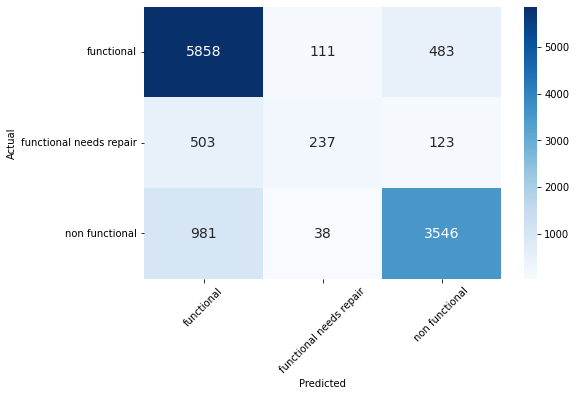

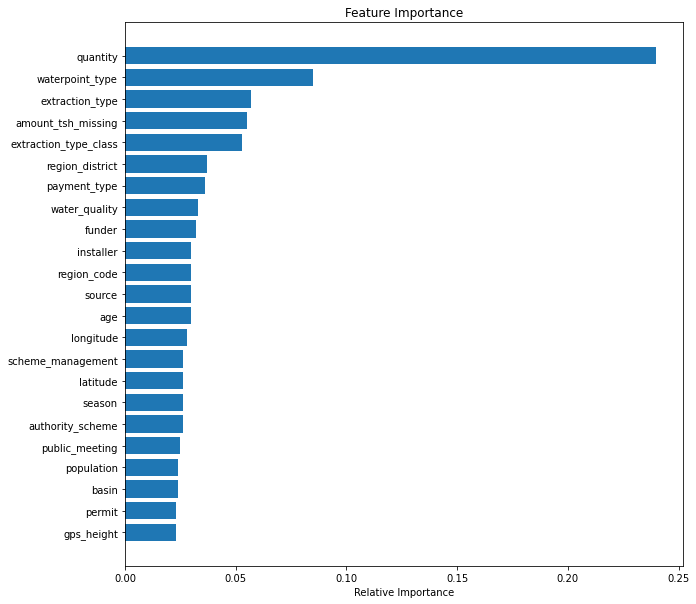

In [23]:
#score model
best_model = XGBClassifier( random_state=42, n_estimators = 200, colsample_bytree = 0.3, eta = 0.2, max_depth = 12 )
best_model .fit(X_train, y_train,  eval_metric = 'mlogloss',)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model)

### 2.4 Catboost

In [ ]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)


param_grid = { 'max_depth': [ 7,8,9],
              'iterations': [1000, 750],
              'rsm' :[0.3, 0.2]}

#Create a based model
cat  =     CatBoostClassifier( random_state=42)

grid_search_cat = GridSearchCV(estimator = cat, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_cat .fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search_cat .best_score_)
print('Parameters:', grid_search_cat .best_params_)
print('Best Model:', grid_search_cat .best_estimator_)




Learning rate set to 0.096348
0:	learn: 1.0292113	total: 33.5ms	remaining: 33.5s
1:	learn: 0.9779545	total: 75.5ms	remaining: 37.7s
2:	learn: 0.9340201	total: 105ms	remaining: 34.9s
3:	learn: 0.8959598	total: 139ms	remaining: 34.7s
4:	learn: 0.8630482	total: 185ms	remaining: 36.8s
5:	learn: 0.8346864	total: 220ms	remaining: 36.5s
6:	learn: 0.8097067	total: 251ms	remaining: 35.7s
7:	learn: 0.7885801	total: 284ms	remaining: 35.2s
8:	learn: 0.7713513	total: 320ms	remaining: 35.3s
9:	learn: 0.7547844	total: 351ms	remaining: 34.7s
10:	learn: 0.7403570	total: 385ms	remaining: 34.6s
11:	learn: 0.7280445	total: 418ms	remaining: 34.4s
12:	learn: 0.7174838	total: 449ms	remaining: 34.1s
13:	learn: 0.7078033	total: 486ms	remaining: 34.2s
14:	learn: 0.6996611	total: 519ms	remaining: 34.1s
15:	learn: 0.6919040	total: 544ms	remaining: 33.5s
16:	learn: 0.6853867	total: 574ms	remaining: 33.2s
17:	learn: 0.6793570	total: 597ms	remaining: 32.6s
18:	learn: 0.6731412	total: 628ms	remaining: 32.4s
19:	learn

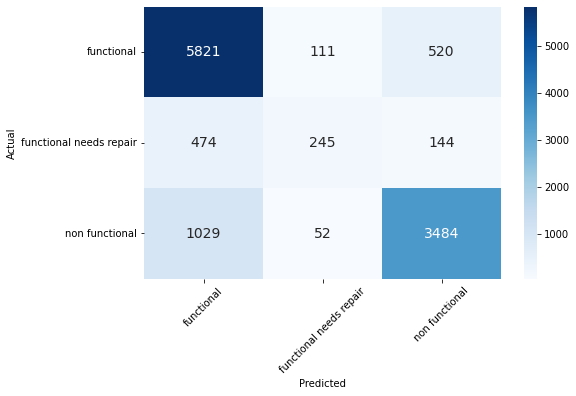

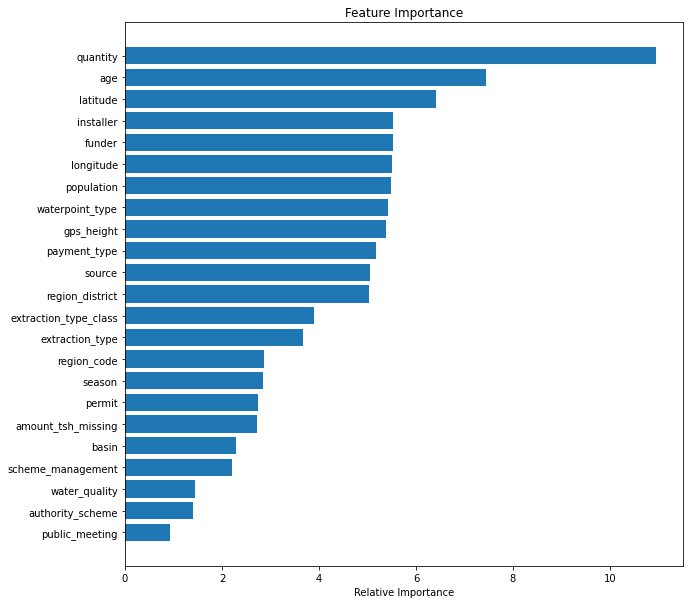

In [24]:
#score model
best_model = CatBoostClassifier( random_state=42, rsm = 0.2, max_depth =9, iterations = 1000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model)

### 2.5 Bagging

In [ ]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42)


param_grid = { 'n_estimators': [100, 200, 300, 400, 500, 700, 800, 900, 1000],
              'max_features': [0.2, 0.25, 0.3, 0.35, 0.4]}

    

#Create a based model
bag  =      BaggingClassifier( random_state=42, )

grid_search_bag = RandomizedSearchCV(estimator = bag, param_distributions = param_grid, cv =5, n_iter = 45,
                               verbose = 2, scoring = 'accuracy')

#fitmodel
grid_search_bag.fit(X_train, y_train )

#print best parameters 
print('Best Score:', grid_search_bag.best_score_)
print('Parameters:', grid_search_bag.best_params_)
print('Best Model:',grid_search_bag .best_estimator_)

Accuracy score train: 0.9642879690229171
Accuracy score test: 0.8079124579124579

                         precision    recall  f1-score   support

             functional       0.80      0.91      0.85      6452
functional needs repair       0.61      0.26      0.37       863
         non functional       0.85      0.77      0.81      4565

               accuracy                           0.81     11880
              macro avg       0.75      0.65      0.67     11880
           weighted avg       0.80      0.81      0.80     11880



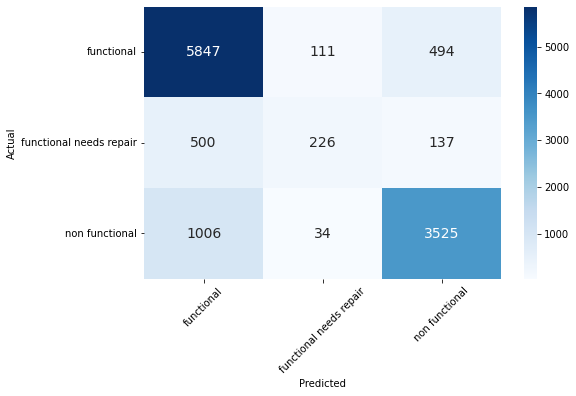

In [25]:
#get scores
best_model = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4 )
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


### 2.6 Mixed vote

In [34]:
rf = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)
xgb = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 42) 
cat = CatBoostClassifier(max_depth = 9, rsm = 0.2, iterations = 1000, random_state = 42)
bag = BaggingClassifier(max_features=0.4, n_estimators=1000, random_state=42) 


Learning rate set to 0.096348
0:	learn: 1.0292113	total: 31.2ms	remaining: 31.2s
1:	learn: 0.9779545	total: 67.5ms	remaining: 33.7s
2:	learn: 0.9340201	total: 98.1ms	remaining: 32.6s
3:	learn: 0.8959598	total: 131ms	remaining: 32.7s
4:	learn: 0.8630482	total: 170ms	remaining: 33.8s
5:	learn: 0.8346864	total: 206ms	remaining: 34.2s
6:	learn: 0.8097067	total: 240ms	remaining: 34s
7:	learn: 0.7885801	total: 273ms	remaining: 33.9s
8:	learn: 0.7713513	total: 310ms	remaining: 34.2s
9:	learn: 0.7547844	total: 341ms	remaining: 33.7s
10:	learn: 0.7403570	total: 371ms	remaining: 33.3s
11:	learn: 0.7280445	total: 408ms	remaining: 33.6s
12:	learn: 0.7174838	total: 438ms	remaining: 33.3s
13:	learn: 0.7078033	total: 465ms	remaining: 32.8s
14:	learn: 0.6996611	total: 499ms	remaining: 32.7s
15:	learn: 0.6919040	total: 524ms	remaining: 32.2s
16:	learn: 0.6853867	total: 554ms	remaining: 32s
17:	learn: 0.6793570	total: 577ms	remaining: 31.5s
18:	learn: 0.6731412	total: 606ms	remaining: 31.3s
19:	learn: 0

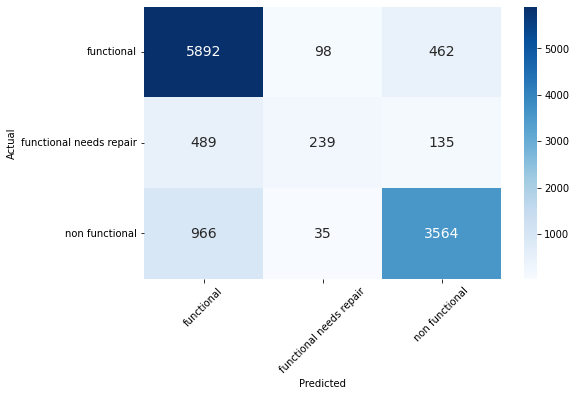

In [35]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft')
                       

#fit and predict
vc.fit(X_train , y_train)
pred= vc .predict(X_test)
pred_train = vc .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

###2.7  Xgboost vote

In [28]:
xgb1 = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 42)
xgb2 = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 2) 
xgb3 = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 142) 
xgb4 = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 33 )
xgb5 = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 678)

Accuracy score train: 0.9217155243165892
Accuracy score test: 0.8128787878787879
                         precision    recall  f1-score   support

             functional       0.80      0.91      0.85      6452
functional needs repair       0.62      0.28      0.39       863
         non functional       0.86      0.77      0.81      4565

               accuracy                           0.81     11880
              macro avg       0.76      0.66      0.68     11880
           weighted avg       0.81      0.81      0.80     11880



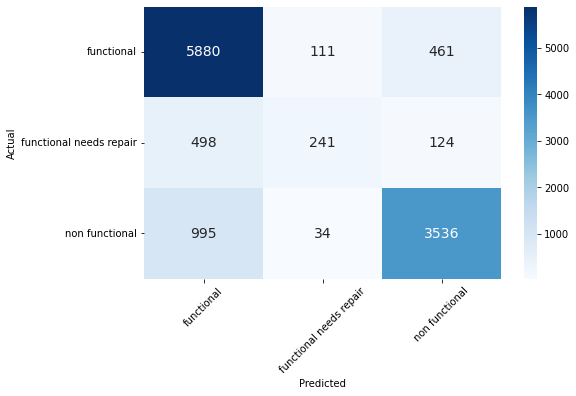

In [29]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


vc = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5)], voting = 'soft')
                       

#fit and predict
vc.fit(X_train , y_train)
pred= vc .predict(X_test)
pred_train = vc .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

### 2.8 Stacking

Streaminguitvoer ingekort tot de laatste 5000 regels.
16:	learn: 0.6853677	total: 484ms	remaining: 28s
17:	learn: 0.6791858	total: 503ms	remaining: 27.4s
18:	learn: 0.6729272	total: 528ms	remaining: 27.3s
19:	learn: 0.6675945	total: 554ms	remaining: 27.1s
20:	learn: 0.6626043	total: 584ms	remaining: 27.2s
21:	learn: 0.6571873	total: 611ms	remaining: 27.2s
22:	learn: 0.6524886	total: 635ms	remaining: 27s
23:	learn: 0.6486921	total: 671ms	remaining: 27.3s
24:	learn: 0.6442582	total: 703ms	remaining: 27.4s
25:	learn: 0.6414799	total: 720ms	remaining: 27s
26:	learn: 0.6372114	total: 753ms	remaining: 27.1s
27:	learn: 0.6328607	total: 778ms	remaining: 27s
28:	learn: 0.6298907	total: 805ms	remaining: 26.9s
29:	learn: 0.6257803	total: 833ms	remaining: 26.9s
30:	learn: 0.6227750	total: 869ms	remaining: 27.2s
31:	learn: 0.6198419	total: 900ms	remaining: 27.2s
32:	learn: 0.6169707	total: 926ms	remaining: 27.1s
33:	learn: 0.6144363	total: 955ms	remaining: 27.1s
34:	learn: 0.6140794	total: 965ms	re

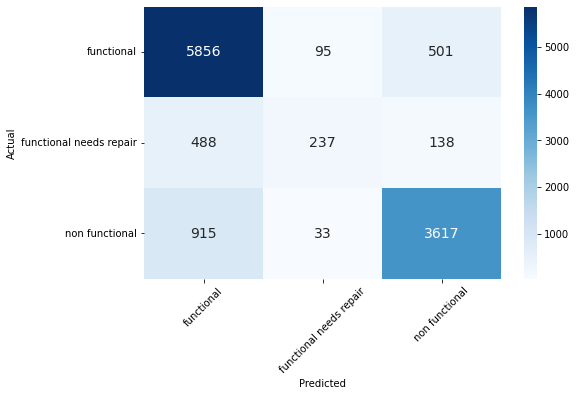

In [30]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


stack = StackingClassifier([('rf', rf), 
                              ('xgb', xgb),
                              ('cat', cat),
                           ('bag', bag)], final_estimator=LogisticRegression())
                       

#fit and predict
stack.fit(X_train , y_train)
pred= stack.predict(X_test)
pred_train = stack.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

### 2.9 Weighted vote

Learning rate set to 0.096348
0:	learn: 1.0292113	total: 31.1ms	remaining: 31.1s
1:	learn: 0.9779545	total: 69.8ms	remaining: 34.8s
2:	learn: 0.9340201	total: 99.3ms	remaining: 33s
3:	learn: 0.8959598	total: 131ms	remaining: 32.7s
4:	learn: 0.8630482	total: 168ms	remaining: 33.4s
5:	learn: 0.8346864	total: 204ms	remaining: 33.8s
6:	learn: 0.8097067	total: 235ms	remaining: 33.4s
7:	learn: 0.7885801	total: 273ms	remaining: 33.8s
8:	learn: 0.7713513	total: 310ms	remaining: 34.1s
9:	learn: 0.7547844	total: 341ms	remaining: 33.8s
10:	learn: 0.7403570	total: 372ms	remaining: 33.5s
11:	learn: 0.7280445	total: 420ms	remaining: 34.5s
12:	learn: 0.7174838	total: 449ms	remaining: 34.1s
13:	learn: 0.7078033	total: 476ms	remaining: 33.5s
14:	learn: 0.6996611	total: 514ms	remaining: 33.7s
15:	learn: 0.6919040	total: 539ms	remaining: 33.2s
16:	learn: 0.6853867	total: 569ms	remaining: 32.9s
17:	learn: 0.6793570	total: 592ms	remaining: 32.3s
18:	learn: 0.6731412	total: 623ms	remaining: 32.2s
19:	learn:

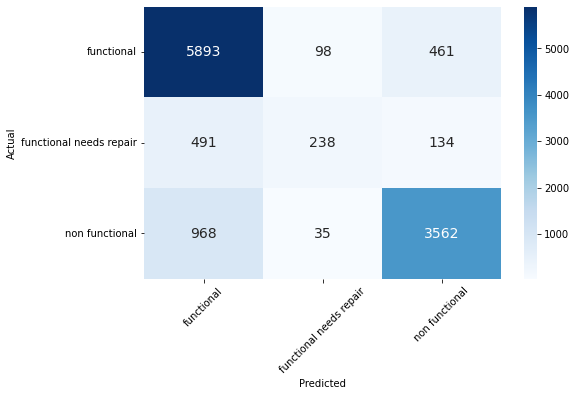

In [31]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = [0.85, 1, 0.85, 0.75])
                       

#fit and predict
vc.fit(X_train , y_train)
pred= vc .predict(X_test)
pred_train = vc .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [ ]:
#fit on foll training set
vc.fit(X , y)

#predict
submission = test_set.drop(['id', 'status_group'], axis=1)
submission['status_group'] = vc.predict(submission)

#bring the id column back
submission['id'] = test_set['id']

#create df for submission and save
best_submission = submission[['id', 'status_group']]
best_submission.head()

In [45]:
best_submission.head()

,id,status_group
59399,50785,non functional
59400,51630,functional
59401,17168,functional
59402,45559,non functional
59403,49871,functional


In [49]:
#best_submission.to_csv('best_submission.csv', index=False)

# 3 Result overview

In [44]:
models = ['Random Forest Classifier', 'XgBoost Classifier', 'CatBoost Classifier', 'Bagging Classifier', 'Mixed Voting Classifier','XGBoost Voting Classifier', 'Stacking Classifier', 'Weighted Voting Classifier']
training_accuracy = [0.9219, 0.9501, 0.8721, 0.8741, 0.9358, 0.9509, 0.9384, 0.9356]
testing_accuracy = [0.8131, 0.8110, 0.8034, 0.8667, 0.8160, 0.8131, 0.8160, 0.8150]
competition_accuracy = [0.8133, 0.8173, 0.8125, 0.8150, 0.8234,  0.8205, 0.8226, 0.8235  ]

d = {'Model':models,'Train accuracy':training_accuracy, 'Test accuracy':testing_accuracy, 'Competition accuracy': competition_accuracy}   
score_df = pd.DataFrame(d)
score_df 

,Model,Train accuracy,Test accuracy,Competition accuracy
0,Random Forest Classifier,0.9219,0.8131,0.8133
1,XgBoost Classifier,0.9501,0.8110,0.8173
2,CatBoost Classifier,0.8721,0.8034,0.8125
3,Bagging Classifier,0.8741,0.8667,0.8150
4,Mixed Voting Classifier,0.9358,0.8160,0.8234
5,XGBoost Voting Classifier,0.9509,0.8131,0.8205
6,Stacking Classifier,0.9384,0.8160,0.8226
7,Weighted Voting Classifier,0.9356,0.8150,0.8235


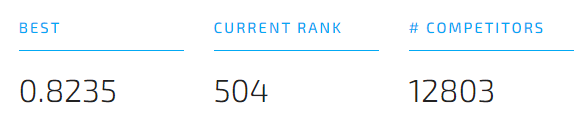

Disclaimer: I did all my modelling in Databricks and transfered by code to Google Colab. The results may therefore vary slightly.